In [11]:
# libraries importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [12]:
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [13]:
# uniques(df) ermittelt die einheitlichen Werte aller kategorischen (nicht numerischen) Spalten
def uniques(df, topn=50):
    import numpy as np 
    dfx = df.select_dtypes([object])
    return pd.DataFrame({'column': dfx.columns,
                         'values': [dfx[col].unique()[:topn] for col in dfx.columns]})

In [14]:
# Daten einlesen

In [15]:
housing = pd.read_csv('../data/Melbourne_full.csv')

Als erstes wollen wir verstehen, wie die Daten beschaffen sind

* Dazu verwenden wir verschieden Funktionen
* `DataFrame.info()` zeigt alle Spalten
* `DataFrame.sample(n)` zeigt eine Zufallsauswahl von n Zeilen
* Mit der Hilfsfunktion `uniques(df)` erhalten wir einen Eindruck der kategorischen Variablen
* `sns.histplot(data=dataframe, y='col')` zeigt ein Histogram für die Variable `col` an


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

Die Daten verstehen

* Weil es sehr viele Daten sind zeigen wir eine Zufallsauswahl von 10 Rows an
* Dazu verwenden wir die Funktion DataFrame.sample()

In [17]:
housing.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12224,Bentleigh,2 Delhi St,2,h,1402000.0,S,Woodards,6/05/2017,13.0,3204.0,2.0,1.0,4.0,616.0,NaN,NaN,Glen Eira City Council,-37.92570,145.04690,Southern Metropolitan,6795.0
5254,Hawthorn,5/67 Auburn Rd,1,u,350000.0,VB,Noel,12/11/2016,4.6,3122.0,1.0,1.0,1.0,0.0,51.0,1960.0,Boroondara City Council,-37.82080,145.04560,Southern Metropolitan,11308.0
22573,Meadow Heights,16 Rokewood Cr,3,h,NaN,S,Barry,23/09/2017,17.4,3048.0,3.0,1.0,1.0,609.0,NaN,NaN,Hume City Council,-37.66051,144.91158,Northern Metropolitan,4704.0
16803,Cheltenham,3/104 Bernard St,3,t,NaN,SN,Greg,27/05/2017,17.9,3192.0,3.0,2.0,2.0,239.0,147.0,2010.0,Bayside City Council,-37.95457,145.06938,Southern Metropolitan,9758.0
17418,Armadale,16/1 Clendon Rd,1,u,NaN,PN,Thomson,8/07/2017,6.3,3143.0,1.0,1.0,1.0,0.0,44.0,1977.0,Stonnington City Council,-37.85029,145.01515,Southern Metropolitan,4836.0
3865,Elwood,4/5 Southey Ct,2,u,717000.0,S,Marshall,12/06/2016,7.7,3184.0,2.0,1.0,1.0,0.0,NaN,1950.0,Port Phillip City Council,-37.87580,144.98740,Southern Metropolitan,8989.0
32542,Clifton Hill,6/16 The Esplanade,1,u,NaN,VB,Jellis,17/02/2018,3.6,3068.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,2954.0
11919,Oakleigh,3 Estelle St,3,h,1045000.0,S,Ray,11/02/2017,14.0,3166.0,3.0,1.0,2.0,602.0,107.0,1950.0,Monash City Council,-37.89230,145.10130,Southern Metropolitan,3224.0
17304,South Yarra,17/43 Kensington Rd,1,u,400000.0,VB,Jellis,27/05/2017,2.7,3141.0,1.0,1.0,1.0,0.0,43.0,1950.0,Melbourne City Council,-37.83678,145.00137,Southern Metropolitan,14887.0
34664,Richmond,406/8 Howard St,2,u,NaN,SP,Jellis,24/02/2018,2.4,3121.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,14949.0


In [18]:
uniques(housing)

,column,values
0,Suburb,"[Abbotsford, Airport West, Albert Park, Alphington, Altona, Altona North, Armadale, Ascot Vale, Ashburton, Ashwood, Avondale Heights, Balaclava, Balwyn, Balwyn North, Bentleigh, Bentleigh East, Box Hill, Braybrook, Brighton, Brighton East, Brunswick, Brunswick West, Bulleen, Burwood, Camberwell, Canterbury, Carlton North, Carnegie, Caulfield, Caulfield North, Caulfield South, Chadstone, Clifton Hill, Coburg, Coburg North, Collingwood, Doncaster, Eaglemont, Elsternwick, Elwood, Essendon, Essendon North, Fairfield, Fitzroy, Fitzroy North, Flemington, Footscray, Glen Iris, Glenroy, Gowanbrae]"
1,Address,"[68 Studley St, 85 Turner St, 25 Bloomburg St, 18/659 Victoria St, 5 Charles St, 40 Federation La, 55a Park St, 16 Maugie St, 53 Turner St, 99 Turner St, 129 Charles St, 124 Yarra St, 121/56 Nicholson St, 17 Raphael St, 98 Charles St, 217 Langridge St, 18a Mollison St, 6/241 Nicholson St, 10 Valiant St, 403/609 Victoria St, 2 Rich St, 25/84 Trenerry Cr, 106/119 Turner St, 411/8 Grosvenor St, 40 Nicholson St, 123/56 Nicholson St, 22 Park St, 13/84 Trenerry Cr, 45 William St, 7/20 Abbotsford St, 16 William St, 16/11 Nicholson St, 42 Henry St, 250 Langridge St, 16b Mollison St, 78 Yarra St, 196 Nicholson St, 42 Valiant St, 3/72 Charles St, 1/1 Mayfield St, 13/11 Nicholson St, 138/56 Nicholson St, 6/219 Nicholson St, 52a William St, 49 Park St, 65/80 Trenerry Cr, 119/52 Nicholson St, 8b Park St, 5/20 Abbotsford St, 48 Abbotsford St]"
2,Type,"[h, u, t]"
3,Method,"[SS, S, VB, SP, PI, SN, W, PN, SA]"
4,SellerG,"[Jellis, Biggin, Rounds, Nelson, Collins, Dingle, Purplebricks, Greg, Philip, LITTLE, Kay, Beller, Marshall, hockingstuart, Brad, Maddison, Barry, Airport, Considine, Rendina, Ray, Propertyau, McDonald, Frank, Prof., Harcourts, Thomson, Buxton, RT, Sotheby's, Cayzer, Chisholm, McGrath, Brace, Miles, Holland, Love, Thomas, Barlow, Sweeney, Village, Jas, Williams, Gunn&Co, Burnham, Point, Compton, FN, Hunter, Raine&Horne]"
5,Date,"[3/09/2016, 3/12/2016, 4/02/2016, 4/03/2017, 4/06/2016, 6/08/2016, 7/05/2016, 7/11/2016, 8/10/2016, 10/12/2016, 12/11/2016, 13/08/2016, 14/05/2016, 15/10/2016, 16/04/2016, 16/07/2016, 17/09/2016, 18/03/2017, 18/06/2016, 19/11/2016, 22/05/2016, 22/08/2016, 23/04/2016, 24/09/2016, 25/02/2017, 26/07/2016, 27/11/2016, 28/05/2016, 30/07/2016, 10/09/2016, 11/02/2017, 27/06/2016, 28/08/2016, 12/06/2016, 11/03/2017, 28/01/2016, 6/05/2017, 8/04/2017, 13/05/2017, 29/04/2017, 20/05/2017, 22/04/2017, 1/07/2017, 3/06/2017, 17/06/2017, 24/06/2017, 27/05/2017, 8/07/2017, 12/08/2017, 15/07/2017]"
6,CouncilArea,"[Yarra City Council, Moonee Valley City Council, Port Phillip City Council, Darebin City Council, Hobsons Bay City Council, Stonnington City Council, Boroondara City Council, Monash City Council, Glen Eira City Council, Whitehorse City Council, Maribyrnong City Council, Bayside City Council, Moreland City Council, Manningham City Council, Melbourne City Council, Banyule City Council, Brimbank City Council, Kingston City Council, Hume City Council, Knox City Council, Maroondah City Council, Casey City Council, Melton City Council, Greater Dandenong City Council, Nillumbik Shire Council, Cardinia Shire Council, Whittlesea City Council, Frankston City Council, Macedon Ranges Shire Council, Yarra Ranges Shire Council, Wyndham City Council, Moorabool Shire Council, Mitchell Shire Council, nan]"
7,Regionname,"[Northern Metropolitan, Western Metropolitan, Southern Metropolitan, Eastern Metropolitan, South-Eastern Metropolitan, Eastern Victoria, Northern Victoria, Western Victoria, nan]"


<Axes: xlabel='Price', ylabel='Count'>

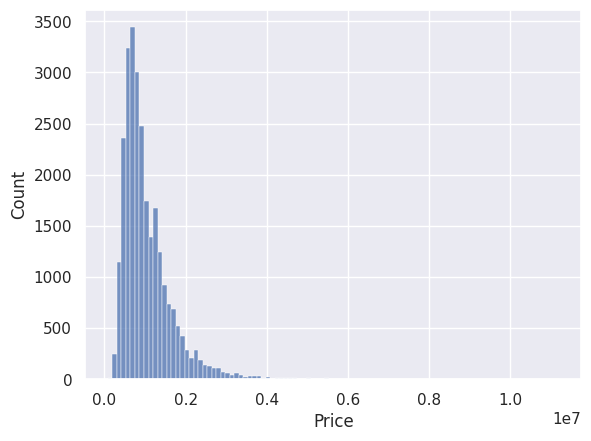

In [19]:
sns.histplot(data=housing, 
             x='Price', 
             bins=100,
             binwidth=None)

<Axes: xlabel='Propertycount', ylabel='Count'>

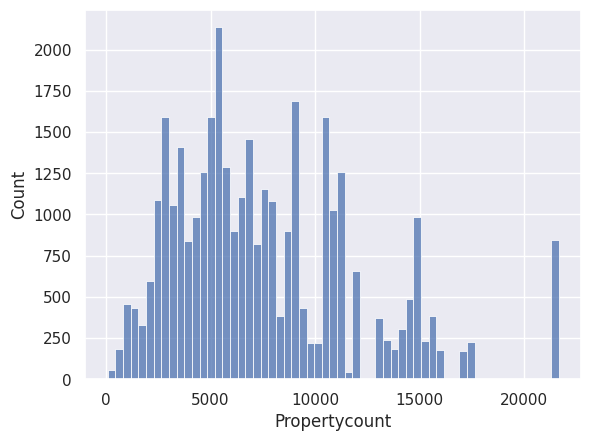

In [20]:
sns.histplot(data=housing, 
             x='Propertycount')

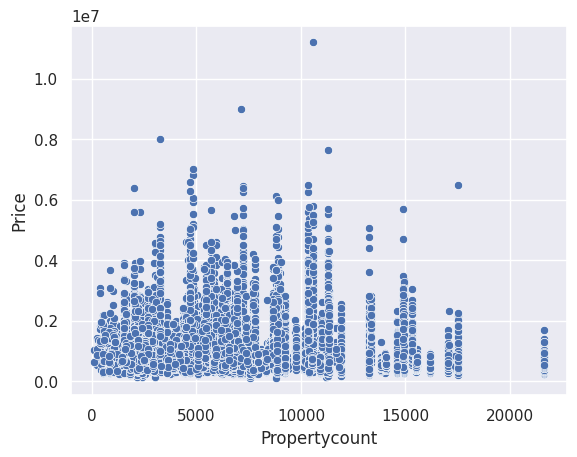

In [21]:
sns.scatterplot(data=housing, 
                x='Propertycount', 
                y='Price')
plt.show()

Gibt es einen Einfluss durch die Region?

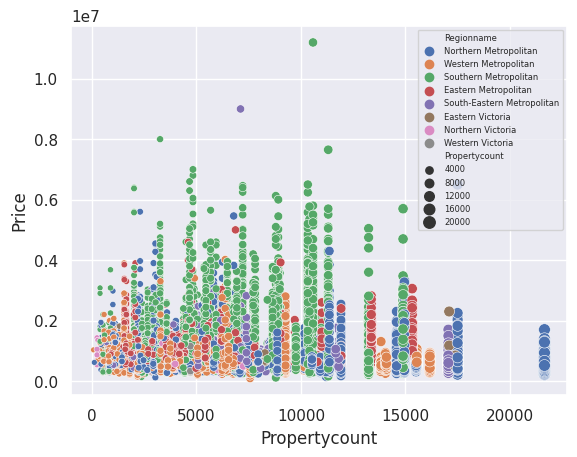

In [22]:
sns.scatterplot(data=housing, 
                x='Propertycount', 
                y='Price',
                size='Propertycount',
                hue='Regionname', )
plt.legend(fontsize=6)
plt.show()

Wie verhalten sich die Preise innerhalb einer Region?

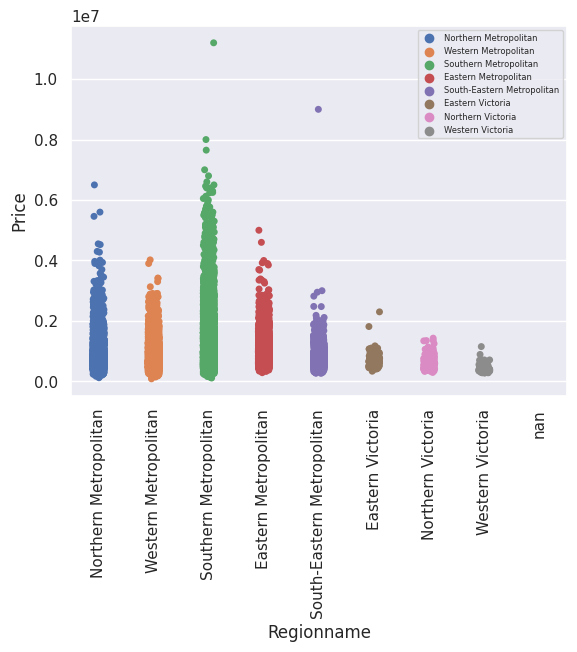

In [23]:
sns.stripplot(data=housing, 
                x='Regionname', 
                y='Price',
                hue='Regionname')
plt.legend(fontsize=6)
plt.xticks(rotation=90)
plt.show()

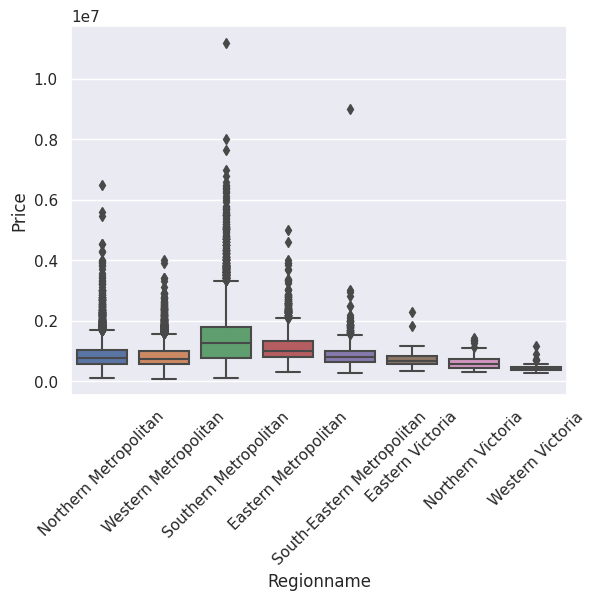

In [24]:
sns.boxplot(data=housing, 
            x='Regionname', 
            y='Price')
plt.xticks(rotation=45)
plt.show()

gibt es einen Trend über Zeit?

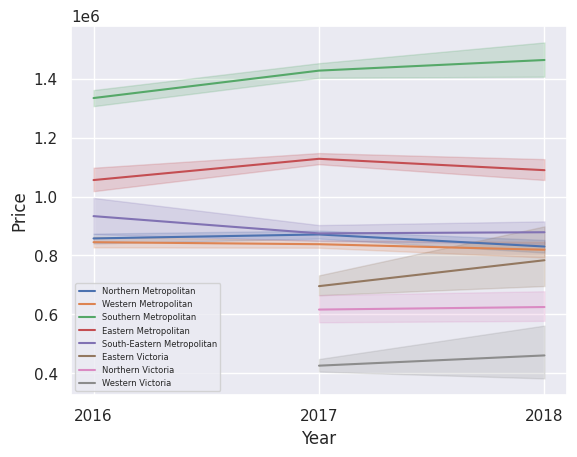

In [25]:
housing['Year'] = (
    pd.to_datetime(housing['Date'], 
                   format='mixed')
    .dt.year
    .astype(str)
)
sns.lineplot(data=housing, x='Year', 
             y='Price', 
             hue='Regionname')
plt.legend(loc='lower left', fontsize=6)

* Gib es einen Zusammenhang zwischen verschiedenen Faktoren? Tipp: `sns.heatmap()`
* Erst Korrelation (corr) berechnen

<Axes: >

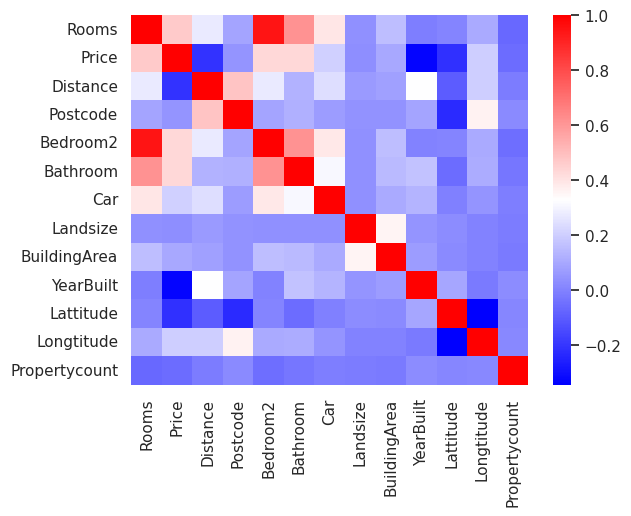

In [26]:
corr = (housing
        .select_dtypes(include='number')
        .corr()
       )
sns.heatmap(data=corr, 
            cmap='bwr')

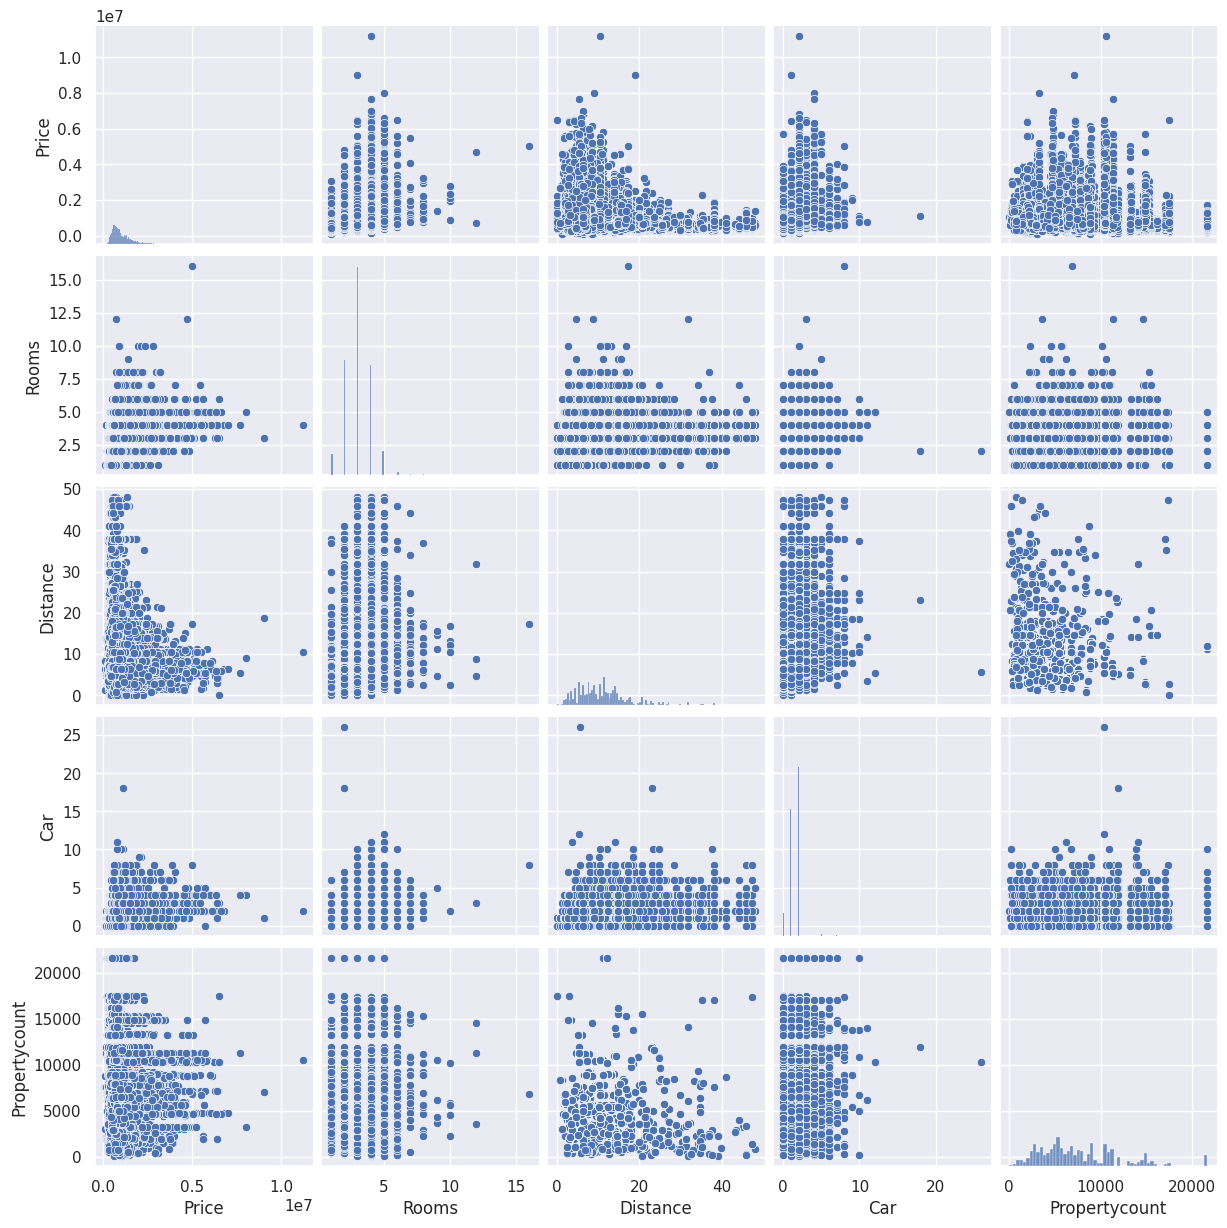

In [27]:
sns.pairplot(data=housing,
             vars=['Price', 'Rooms', 'Distance', 'Car', 'Propertycount'])

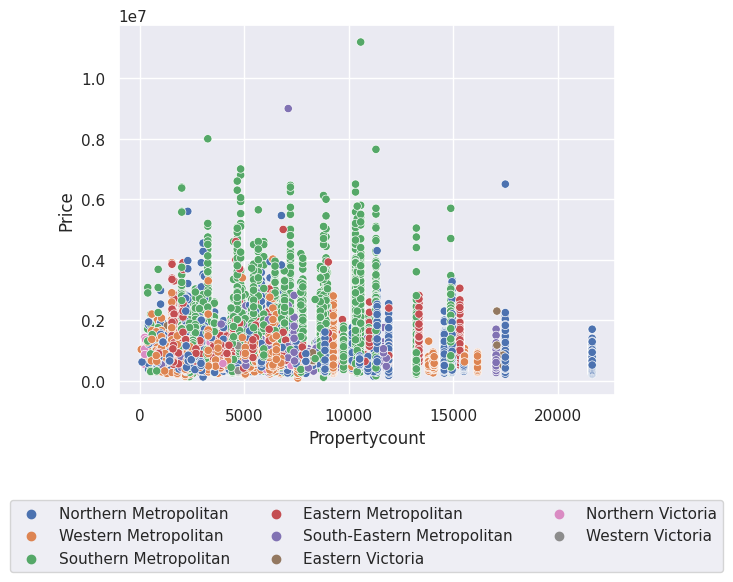

In [28]:
sns.scatterplot(data=housing, 
                x='Propertycount', 
                y='Price', 
                hue='Regionname')
plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -.5), 
           ncols=3)
plt.show()

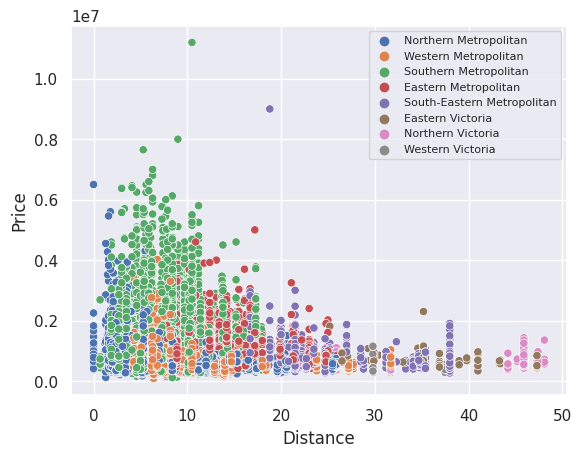

In [29]:
sns.scatterplot(data=housing, 
                x='Distance', 
                y='Price',
                hue='Regionname')
plt.legend(fontsize=8)